In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import googlemaps

In [82]:
df=pd.read_csv('../data/nyc_dept_fin.csv')

In [83]:
#df1=pd.read_csv('../data/outpu1DONTDELETE.csv')

In [84]:
df.head()

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,building_class_at_present,address,apartment_number,zip_code,...,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date,price_per_sqft
0,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,376,43.0,S1,743 EAST 6TH STREET,NaN,10009.0,...,1.0,2.0,2090.0,3680.0,1940.0,1,S1,3200000.0,7/24/19,869.565217
1,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,390,61.0,A4,189 EAST 7TH STREET,NaN,10009.0,...,0.0,1.0,987.0,2183.0,1860.0,1,A4,0.0,9/25/19,0.000000
2,1,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,404,1.0,B9,166 AVENUE A,NaN,10009.0,...,0.0,2.0,1510.0,4520.0,1900.0,1,B9,0.0,7/22/19,0.000000
3,1,ALPHABET CITY,03 THREE FAMILY DWELLINGS,1,377,56.0,C0,263 EAST 7TH STREET,NaN,10009.0,...,0.0,3.0,2430.0,3600.0,1899.0,1,C0,6300000.0,4/30/19,1750.000000
4,1,ALPHABET CITY,03 THREE FAMILY DWELLINGS,1,393,9.0,C0,604 EAST 11TH STREET,NaN,10009.0,...,0.0,3.0,2375.0,5110.0,1939.0,1,C0,0.0,10/24/19,0.000000


In [85]:
df.shape

(79071, 21)

In [86]:
df.groupby('building_class_category')['building_class_category'].count().sort_values(ascending=False).head(7)

building_class_category
01 ONE FAMILY DWELLINGS            17864
02 TWO FAMILY DWELLINGS            15454
10 COOPS - ELEVATOR APARTMENTS     11897
13 CONDOS - ELEVATOR APARTMENTS    11312
03 THREE FAMILY DWELLINGS           4475
07 RENTALS - WALKUP APARTMENTS      2830
09 COOPS - WALKUP APARTMENTS        2419
Name: building_class_category, dtype: int64

In [87]:
nyc=[10453,10457,10460,10458,10467,10468,10451,10452,10456,10454,10455,10459,10474,10463,10471,10466,10469,
10470,10475,10461,10462,10464,10465,10472,10473,11212,11213,11216,11233,11238,11209,11214,11228,
11204,11218,11219,11230,11234,11236,11239,11223,11224,11229,11235,11201,11205,11215,11217,11231,
11203,11210,11225,11226,11207,11208,11211,11222,11220,11232,11206,11221,11237,10026,10027,10030,10037,10039,
10001,10011,10018,10019,10020,10036,10029,10035,10010,10016,10017,10022,10012,10013,10014,
10004,10005,10006,10007,10038,10280,10002,10003,10009,10021,10028,10044,10065,10075,10128,10023,10024,10025,
10031,10032,10033,10034,10040,11361,11362,11363,11364,11354,11355,11356,11357,11358,11359,11360,
11365,11366,11367,11412,11423,11432,11433,11434,11435,11436,11101,11102,11103,11104,11105,11106,
11374,11375,11379,11385,11691,11692,11693,11694,11695,11697,11004,11005,11411,11413,11422,11426,11427,11428,11429,
11414,11415,11416,11417,11418,11419,11420,11421,11368,11369,11370,11372,11373,11377,11378,10302,10303,10310,
10306,10307,10308,10309,10312,10301,10304,10305,10314]

In [88]:
bronx=[10453,10457,10460,10458,10467,10468,10451,10452,10456,10454,10455,10459,10474,10463,10471,10466,10469,
10470,10475,10461,10462,10464,10465,10472,10473]

In [89]:
brooklyn=[11212,11213,11216,11233,11238,11209,11214,11228,
11204,11218,11219,11230,11234,11236,11239,11223,11224,11229,11235,11201,11205,11215,11217,11231,
11203,11210,11225,11226,11207,11208,11211,11222,11220,11232,11206,11221,11237]

In [90]:
manhattan=[10026,10027,10030,10037,10039,
10001,10011,10018,10019,10020,10036,10029,10035,10010,10016,10017,10022,10012,10013,10014,
10004,10005,10006,10007,10038,10280,10002,10003,10009,10021,10028,10044,10065,10075,10128,10023,10024,10025,
10031,10032,10033,10034,10040]

In [91]:
queen=[11361,11362,11363,11364,11354,11355,11356,11357,11358,11359,11360,
11365,11366,11367,11412,11423,11432,11433,11434,11435,11436,11101,11102,11103,11104,11105,11106,
11374,11375,11379,11385,11691,11692,11693,11694,11695,11697,11004,11005,11411,11413,11422,11426,11427,11428,11429,
11414,11415,11416,11417,11418,11419,11420,11421,11368,11369,11370,11372,11373,11377,11378]

In [92]:
staten_island=[10302,10303,10310,
10306,10307,10308,10309,10312,10301,10304,10305,10314]

In [93]:
len(staten_island)+len(brooklyn)+len(queen)+len(bronx)+len(manhattan)

178

In [94]:
len(nyc)

178

In [95]:
df.isnull().mean().sort_values(ascending=False)

apartment_number                  0.775796
price_per_sqft                    0.260500
land_square_feet                  0.199656
commercial_units                  0.199656
total_units                       0.199656
residential_units                 0.199656
gross_square_feet                 0.199643
year_built                        0.072353
building_class_at_present         0.003870
tax_class_at_present              0.003870
zip_code                          0.000177
tax_class_at_time_of_sale         0.000000
building_class_at_time_of_sale    0.000000
sale_date                         0.000000
sale_price                        0.000000
address                           0.000000
lot                               0.000000
block                             0.000000
building_class_category           0.000000
neighborhood                      0.000000
borough                           0.000000
dtype: float64

In [96]:
df.dropna(subset = ['zip_code'], inplace=True)

In [97]:
df['zip_code']=df['zip_code'].astype(int)

In [98]:
df['in_nyc']=[i in nyc for i in df['zip_code']]
df['in_mh']=[i in manhattan for i in df['zip_code']]
df['in_bk']=[i in brooklyn for i in df['zip_code']]
df['in_si']=[i in staten_island for i in df['zip_code']]
df['in_bx']=[i in bronx for i in df['zip_code']]
df['in_qu']=[i in queen for i in df['zip_code']]

In [99]:
df[df['in_qu']==True]['building_class_category'].value_counts().head()

01 ONE FAMILY DWELLINGS            8730
02 TWO FAMILY DWELLINGS            5689
10 COOPS - ELEVATOR APARTMENTS     3287
13 CONDOS - ELEVATOR APARTMENTS    1452
03 THREE FAMILY DWELLINGS          1316
Name: building_class_category, dtype: int64

In [100]:
df[df['in_si']==True]['building_class_category'].value_counts().head()

01 ONE FAMILY DWELLINGS            4213
02 TWO FAMILY DWELLINGS            1676
05 TAX CLASS 1 VACANT LAND          465
04 TAX CLASS 1 CONDOS               439
13 CONDOS - ELEVATOR APARTMENTS     128
Name: building_class_category, dtype: int64

In [101]:
df[df['in_bx']==True]['building_class_category'].value_counts().head()

02 TWO FAMILY DWELLINGS            2083
01 ONE FAMILY DWELLINGS            1436
10 COOPS - ELEVATOR APARTMENTS      940
03 THREE FAMILY DWELLINGS           870
13 CONDOS - ELEVATOR APARTMENTS     477
Name: building_class_category, dtype: int64

In [102]:
df[df['in_bk']==True]['building_class_category'].value_counts().head()

02 TWO FAMILY DWELLINGS            5852
01 ONE FAMILY DWELLINGS            3263
03 THREE FAMILY DWELLINGS          2135
13 CONDOS - ELEVATOR APARTMENTS    2099
10 COOPS - ELEVATOR APARTMENTS     2007
Name: building_class_category, dtype: int64

In [103]:
df[df['in_mh']==True]['building_class_category'].value_counts().head()

13 CONDOS - ELEVATOR APARTMENTS    6798
10 COOPS - ELEVATOR APARTMENTS     5585
17 CONDO COOPS                      847
09 COOPS - WALKUP APARTMENTS        723
07 RENTALS - WALKUP APARTMENTS      599
Name: building_class_category, dtype: int64

In [104]:
df[df['in_mh']==True]['building_class_at_time_of_sale'].value_counts().head()

R4    6798
D4    5372
R9     847
C6     723
R1     246
Name: building_class_at_time_of_sale, dtype: int64

In [105]:
df[df['in_si']==True]['building_class_at_time_of_sale'].value_counts().head()

A5    1729
A1    1215
B2    1103
A2     851
V0     463
Name: building_class_at_time_of_sale, dtype: int64

In [106]:
df[df['in_bx']==True]['building_class_at_time_of_sale'].value_counts().head()

B1    963
D4    940
C0    870
B2    628
A1    544
Name: building_class_at_time_of_sale, dtype: int64

In [107]:
df[df['in_qu']==True]['building_class_at_time_of_sale'].value_counts().head()

A1    4198
D4    3287
A5    2039
B3    2029
B2    1925
Name: building_class_at_time_of_sale, dtype: int64

In [108]:
df[df['in_bk']==True]['building_class_at_time_of_sale'].value_counts().head()

B1    2270
C0    2135
R4    2099
D4    2006
B2    1193
Name: building_class_at_time_of_sale, dtype: int64

In [109]:
# df[(df['in_nyc']==True)&
#    ((df['building_class_category']=='01 ONE FAMILY DWELLINGS')|
#     (df['building_class_category']=='10 COOPS - ELEVATOR APARTMENTS')|
#    (df['building_class_category']=='13 CONDOS - ELEVATOR APARTMENTS')|
#     (df['building_class_category']=='10 COOPS - ELEVATOR APARTMENTS'))].shape
                                                                                                          
                                                                                                          
                                                                                                          
                                                                                                          

In [110]:
df[((df['in_si']==True)|(df['in_mh']==True)|(df['in_qu']==True)|(df['in_bx']==True)|(df['in_bk']==True))&
   ((df['building_class_at_time_of_sale']=='B1')|(df['building_class_at_time_of_sale']=='R4')|
   (df['building_class_at_time_of_sale']=='D4')|(df['building_class_at_time_of_sale']=='A1')|
   (df['building_class_at_time_of_sale']=='A5'))].shape

(39602, 27)

In [111]:
df['sale_price'].quantile(.32)

20000.0

In [112]:
df['sale_price'].sort_values().head(25)

79070    0.0
25171    0.0
64730    0.0
25169    0.0
25168    0.0
25167    0.0
25165    0.0
25164    0.0
25163    0.0
25162    0.0
25161    0.0
25160    0.0
64732    0.0
25172    0.0
25158    0.0
64736    0.0
64737    0.0
64738    0.0
25146    0.0
25145    0.0
25144    0.0
25143    0.0
64742    0.0
64744    0.0
25136    0.0
Name: sale_price, dtype: float64

In [113]:
df.shape

(79057, 27)

In [114]:
df.drop(df[df['sale_price']==0].index, axis = 0, inplace=True)

In [115]:
df.shape

(55245, 27)

(array([5.4693e+04, 2.9400e+02, 7.2000e+01, 4.8000e+01, 3.1000e+01,
        8.0000e+00, 2.3000e+01, 3.0000e+00, 6.0000e+00, 6.0000e+00,
        2.0000e+00, 2.0000e+00, 3.4000e+01, 3.0000e+00, 1.0000e+00,
        9.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

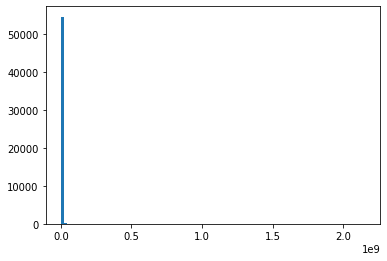

In [116]:
plt.hist(df['sale_price'],bins=100)

In [37]:
df[df['sale_price']==100].groupby('neighborhood')['neighborhood'].count().sort_values()

Series([], Name: neighborhood, dtype: int64)

In [38]:
gmaps_key=googlemaps.Client(key='')

ValueError: Must provide API key or enterprise credentials when creating client.

In [ ]:
df['latitude']=None
df['longitude']=None

In [ ]:
df.loc[0,'address']

In [ ]:
# bounds={
#     'northeast': [40.911, -73.71],
#     'southwest': [40.5, -74.26]
# }

In [ ]:
# for i in df.index[:4000]:
#     geocode_result=gmaps_key.geocode(df.loc[i,'address'],bounds=bounds)
#     try:
#         lat=geocode_result[0]['geometry']['location']['lat']
#         lon=geocode_result[0]['geometry']['location']['lng']
#         df.loc[i,'latitude']=lat
#         df.loc[i,'longitude']=lon
#     except:
#         lat=None
#         lon=None
    

In [ ]:
df1.shape

In [ ]:
df1=df1[(df1['latitude'].notnull())&(df1['latitude']>40.5)&(df1['latitude']<40.92)&(df1['longitude']>-74.252)&(df1['longitude']<-73.71)]

In [ ]:
df1.head()

In [ ]:
df1=df1[(df1['latitude'].notnull())&(df1['latitude']>40.5)]

In [ ]:
df1=df1[(df1['latitude'].notnull())&(df1['latitude']<40.92)]

In [ ]:
df1=df1[(df1['longitude'].notnull())&(df1['longitude']>-74.252)]

In [ ]:
df1=df1[(df1['longitude'].notnull())&(df1['longitude']<-73.71)]

In [ ]:
df1[(df1['building_class_category']=='01 ONE FAMILY DWELLINGS')&(df1['zip_code']==10025)].count()

In [ ]:
(df[df['longitude'].notnull()]['longitude']<-74.252).sum()

In [ ]:
(df[df['longitude'].notnull()]['longitude']>-73.71).sum()

In [ ]:
df['latitude'].sort_values().head(35)

In [ ]:
#df.to_csv('../data/outpu2.csv')

In [ ]:
plt.scatter(df1[df1['longitude'].notnull()]['longitude'],df1[df1['latitude'].notnull()]['latitude'])

In [ ]:
df1.shape